<a href="https://colab.research.google.com/github/wrn6494/8-Week-SQL-Challenge/blob/main/Case_Study_6_Clique_Bait.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **8 Week SQL Challenge : Case Study #6 - Clique Bait**

Full case study available [here.](https://8weeksqlchallenge.com/case-study-6/)

**Probem Statement/Business Task**

Clique Bait an online seafood store that wants to expand knowledge in the seafood industry by analysing the dataset and coming up with creative solutions to calculate funnel fallout rates for the online store.

# **Case Study Questions**

1. Using the following DDL schema details to create an **Enterprise Relationship Diagram** for all the Clique Bait datasets.

2. **Digital Analysis**
    1.  How many users are there?
    2.  How many cookies does each user have on average?
    3.  What is the unique number of visits by all users per month?
    4.  What is the number of events for each event type?
    5.  What is the percentage of visits which have a purchase event?
    6.  What is the percentage of visits which view the checkout page but do not have a purchase event?
    7.  What are the top 3 pages by number of views?
    8.  What is the number of views and cart adds for each product category?
    9.  What are the top 3 products by purchases?

3. **Product Funnel Analysis**

    1.   Using a single SQL query - create a new output table which has the following details:

    How many times was each product viewed?
    How many times was each product added to cart?
    How many times was each product added to a cart but not purchased (abandoned)?
    How many times was each product purchased?
    
    2.   Additionally, create another table which further aggregates the data for the above points but this time for each product category instead of individual products.
    3.  Which product had the most views, cart adds and purchases?
    4.  Which product was most likely to be abandoned?
    5.  Which product had the highest view to purchase percentage?
    6.  What is the average conversion rate from view to cart add?
    7.  What is the average conversion rate from cart add to purchase?

4. **Campaigns Analysis**

Generate a table that has 1 single row for every unique visit_id record and has the following columns:

      user_id
      visit_id
      visit_start_time: the earliest event_time for each visit
      page_views: count of page views for each visit
      cart_adds: count of product cart add events for each visit
      purchase: 1/0 flag if a purchase event exists for each visit
      campaign_name: map the visit to a campaign if the visit_start_time falls between the start_date and end_date
      impression: count of ad impressions for each visit
      click: count of ad clicks for each visit
      (Optional column) cart_products: a comma separated text value with products added to the cart sorted by the order they were added to the cart (hint: use the sequence_number)




# **1. Enterprise Relationship Diagram**

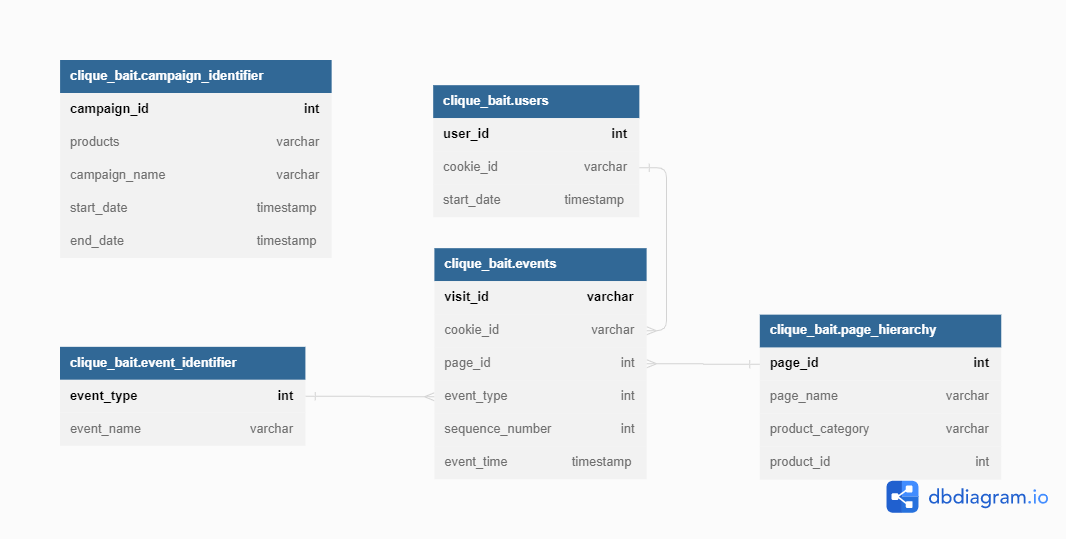

# **2. Digital Analysis**

1. How many users are there?

        SELECT DISTINCT COUNT(user_id)
        FROM clique_bait.users;

| count |
| ------| 
| 1782  | 

2. How many cookies does each user have on average?

          WITH A AS
          (
          SELECT COUNT(e.cookie_id) as count
          FROM clique_bait.users u
          RIGHT JOIN clique_bait.events e
          ON u.cookie_id=e.cookie_id
          GROUP BY user_id
          )

          SELECT ROUND(AVG(count),0) AS avg_cookie_count
          FROM A;

| avg_cookie_count |
| -----------------| 
|       65         | 

3. What is the unique number of visits by all users per month?

        SELECT EXTRACT(month FROM event_time) as month, COUNT(DISTINCT visit_id)
        FROM clique_bait.events
        GROUP BY month
        ORDER BY month ASC;


| month | count |
| ------| ------|  
|   1   | 876 |
|   2   | 1488  |
|   3   | 916 |
|   4   | 248 |
|   5   | 36  |

4. What is the number of events for each event type?

          SELECT event_type, COUNT(visit_id)
          FROM clique_bait.events
          GROUP BY event_type
          ORDER BY event_type;

| event_type | count |
| ------| ------|  
|   1   | 20928 |
|   2   | 8451  |
|   3   | 1777 |
|   4   | 876 |
|   5   | 702  |

5. What is the percentage of visits which have a purchase event?

        WITH A AS
        (
        SELECT event_type, COUNT(visit_id)
        FROM clique_bait.events
        GROUP BY event_type
        ORDER BY event_type
        )

        SELECT ROUND((SELECT count FROM A WHERE event_type=3)*100/SUM(count),2) AS percentage
        FROM A

| percentage |
| -----------| 
|    5.43    | 

6. What is the percentage of visits which view the checkout page but do not have a purchase event?

        WITH A AS
        (
        SELECT visit_id
        FROM clique_bait.events 
        WHERE page_id =12
        ),
        B AS
        (
        SELECT visit_id
        FROM clique_bait.events 
        WHERE page_id=13
        ),
        C AS
        (
        SELECT COUNT(visit_id) as no_purchase
        FROM A  
        WHERE visit_id NOT IN  (  
        SELECT visit_id  
        FROM B)
        ),
        D AS
        (
        SELECT COUNT(visit_id) AS total
        FROM clique_bait.events
        )

        SELECT ((SELECT no_purchase FROM C)*100)/SUM(total)
        FROM D


| percentage |
| -----------| 
|    0.99    | 

7. What are the top 3 pages by number of views?

          WITH A AS
          (
          SELECT page_name, COUNT(visit_id) as count
          FROM clique_bait.events
          JOIN clique_bait.page_hierarchy
          USING (page_id)
          GROUP BY page_name
          ORDER BY count DESC
          )

          SELECT page_name
          FROM A
          LIMIT 3;

| page_name|
| -----------| 
|    All Products    | 
|    Lobster    | 
|    Crab   | 


8. What is the number of views and cart adds for each product category?

        WITH A AS 
        (
        SELECT page_name, COUNT(visit_id) as view_count
        FROM clique_bait.events
        JOIN clique_bait.page_hierarchy
        USING (page_id)
        WHERE event_type=1
        GROUP BY page_name
        ORDER BY page_name
        ),

        B AS
        (
        SELECT page_name, COUNT(event_type) as addtocart_count
        FROM clique_bait.events
        JOIN clique_bait.page_hierarchy
        USING (page_id)
        WHERE event_type=2
        GROUP BY page_name
        ORDER BY page_name
        )

        SELECT A.page_name,view_count,addtocart_count
        FROM A JOIN B USING(page_name)

|page_name|view_count|addtocart_count|
| ------| ------| ------|    
|  Abalone  | 2457 | 932 |
|  Black Truffle |2393  | 924|
| Crab  |2513  | 949 |
|  Kingfish   | 2479 | 920 |
|  Lobster	  | 2515 |968  |
|  Oyster	  | 2511 | 943 |
|  Russian Caviar	  |2509  | 946 |
|  Salmon	  | 2497  | 938 |
|  Tuna	  |2446   |931  |

9. What are the top 3 products by purchases?

        WITH A AS
        (
        SELECT visit_id,page_name,event_type
        FROM clique_bait.events
        JOIN clique_bait.page_hierarchy
        USING (page_id)
        WHERE event_type=2
        ),
        B AS
        (
        SELECT visit_id
        FROM clique_bait.events 
        WHERE event_type=3
        )

        SELECT page_name, COUNT(visit_id) AS purchase_count
        FROM A
        WHERE visit_id IN (SELECT visit_id FROM B)
        GROUP BY page_name
        ORDER BY  purchase_count DESC
        LIMIT 3

| page_name | purchase_count |
| ------| ------|  
|   Lobster   | 754 |
|   Oyster   | 726  |
|   Crab  | 719 |

#**3. Product Funnel Analysis**

 1.   Using a single SQL query - create a new output table which has the following details:

    How many times was each product viewed?
    How many times was each product added to cart?
    How many times was each product added to a cart but not purchased (abandoned)?
    How many times was each product purchased?

    WITH A AS
    (
    SELECT page_name, COUNT(event_type) as views
    FROM clique_bait.events
    JOIN clique_bait.page_hierarchy
    USING (page_id)
    WHERE event_type=1
    GROUP BY page_name
    ),
    B AS
    (
    SELECT page_name, COUNT(event_type) as addcart_count
    FROM clique_bait.events
    JOIN clique_bait.page_hierarchy
    USING (page_id)
    WHERE event_type=2
    GROUP BY page_name
    ),
    C AS
    (
    SELECT visit_id,page_name,event_type
    FROM clique_bait.events  
    JOIN clique_bait.page_hierarchy
    USING (page_id)
    WHERE event_type=2
    ),
    D AS
    (
    SELECT visit_id
    FROM clique_bait.events 
    WHERE event_type=3
    ),
    E AS 
    (
    SELECT page_name, COUNT(visit_id) AS purchase_count
    FROM C
    WHERE visit_id IN (SELECT visit_id FROM D)
    GROUP BY C.page_name
    )

    SELECT A.page_name, views, addcart_count, (addcart_count-purchase_count) AS addcart_only, purchase_count
    FROM A
    JOIN B
    USING (page_name)
    JOIN E
    USING (page_name)
    ORDER BY page_name

|page_name|views|addcart_count|addcart_only|purchase_count|
| ------| ------| ------| ------| ------|    
|  Abalone  | 1525 | 932 |233  |699  |
|  Black Truffle |1469 | 924|217  |707  |
| Crab  |1564  | 949 |230  |719  |
|  Kingfish   | 1559 | 920 |213  |707  |
|  Lobster	  | 1547 |968  |214  |754  |
|  Oyster	  | 1568 | 943 |217  |726  |
|  Russian Caviar	  |1563  | 946 |249  |697  |
|  Salmon	  | 1559  | 938 |227  | 711 |
|  Tuna	  |1515  |931  |234   |697  |


2.   Additionally, create another table which further aggregates the data for the above points but this time for each product category instead of individual products.


    SELECT product_category, 
      SUM(views) AS views,
      SUM(addcart_count) AS addcart_count, 
        SUM(addcart_only) AS addcart_only, 
        SUM(purchase_count) AS purchase_count
    FROM clique_bait.products
    JOIN clique_bait.page_hierarchy
    USING (page_name)
    GROUP BY product_category

3.  Which product had the most views, cart adds and purchases?


*   most viewed - Oyster
*   most cart adds - Lobster
*   most purchases - Lobster


4.  Which product was most likely to be abandoned?

  Russian Caviar with 249 instances.

5.  Which product had the highest view to purchase percentage?

  Lobster with 48.74%

6.  What is the average conversion rate from view to cart add?

  60.95%

7.  What is the average conversion rate from cart add to purchase?

  75.93%

# **4. Campaigns Analysis**

Generate a table that has 1 single row for every unique visit_id record and has the following columns:

      user_id
      visit_id
      visit_start_time: the earliest event_time for each visit
      page_views: count of page views for each visit
      cart_adds: count of product cart add events for each visit
      purchase: 1/0 flag if a purchase event exists for each visit
      campaign_name: map the visit to a campaign if the visit_start_time falls between the start_date and end_date
      impression: count of ad impressions for each visit
      click: count of ad clicks for each visit
      (Optional column) cart_products: a comma separated text value with products added to the cart sorted by the order they were added to the cart (hint: use the sequence_number)

    WITH A AS
    (
    SELECT DISTINCT visit_id,
    user_id, 
    campaign_name
    FROM clique_bait.events e
    JOIN clique_bait.users u
    USING (cookie_id) 
    LEFT JOIN clique_bait.campaign_identifier AS c
    ON e.event_time BETWEEN c.start_date AND c.end_date
    ORDER BY user_id
    ),
    B AS
    (  
    SELECT visit_id, MIN(event_time) AS visit_start_time,
    SUM(CASE WHEN event_type = 1 THEN 1 ELSE 0 END) AS page_views,
    SUM(CASE WHEN event_type = 2 THEN 1 ELSE 0 END) AS cart_adds,
    SUM(CASE WHEN event_type = 3 THEN 1 ELSE 0 END) AS purchase,
    SUM(CASE WHEN event_type = 4 THEN 1 ELSE 0 END) AS impression,
    SUM(CASE WHEN event_type = 5 THEN 1 ELSE 0 END) AS click
    FROM clique_bait.events
    GROUP BY visit_id
    ),
    C AS
    (
    SELECT visit_id, STRING_AGG(CASE WHEN p.product_id IS NOT NULL AND e.event_type = 2 THEN p.page_name ELSE NULL END, ', ' ORDER BY e.sequence_number) AS cart_products
    FROM clique_bait.page_hierarchy p
    JOIN clique_bait.events e
    USING (page_id)
    GROUP BY visit_id
    )
    

    SELECT A.visit_id,visit_start_time,page_views,cart_adds,purchase,impression,click,campaign_name, cart_products
    FROM A
    JOIN B
    USING (visit_id)
    JOIN C
    USING (visit_id)